# Supporting ipynb file for Inferential Statistics Project  
**Name:** Kanimozhi S  
**Course:** Great Learning – Data Science PG Program  

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro

#Problem 1

Answered in business report

# Problem 2

2.1 What proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm?

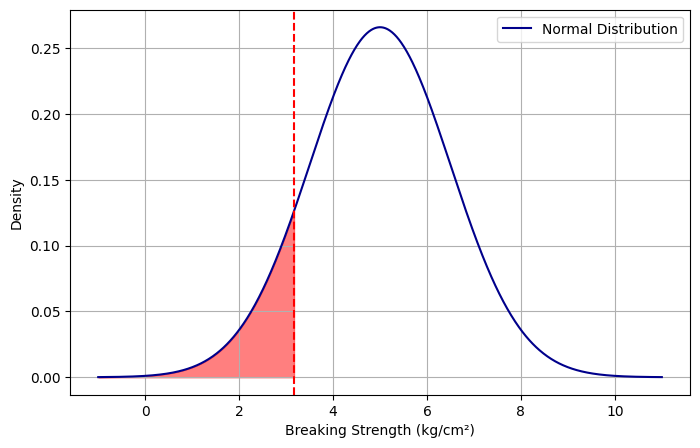

In [ ]:
mu = 5
sigma = 1.5
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
value = 3.17

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Normal Distribution", color='darkblue')
plt.fill_between(x, y, where=(x < value), color='red', alpha=0.5)
plt.axvline(x=value, color='red', linestyle='--')
plt.xlabel("Breaking Strength (kg/cm²)")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()

2.2 What proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm.?

In [ ]:
z_2_2 = (3.6 - mu) / sigma
p_2_2 = 1 - norm.cdf(z_2_2)
print(f"2.2: P(X ≥ 3.6) = {p_2_2:.4f}")

2.2: P(X ≥ 3.6) = 0.8247


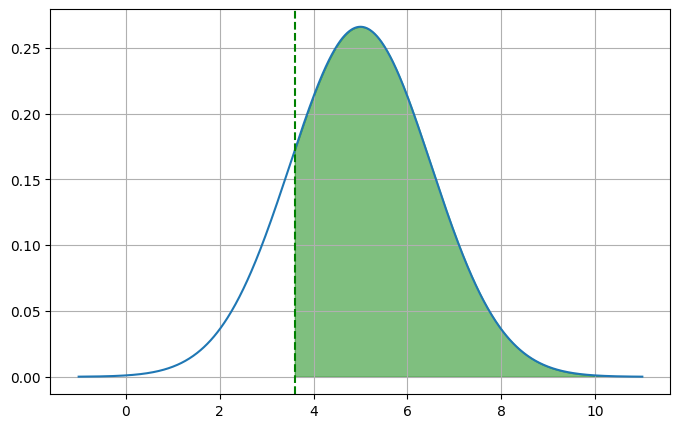

In [ ]:
val_2_2 = 3.6
p_2_2 = 1 - norm.cdf((val_2_2 - mu) / sigma)
plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.fill_between(x, y, where=(x >= val_2_2), color='green', alpha=0.5)
plt.axvline(val_2_2, color='green', linestyle='--')
plt.grid(True)
plt.show()

2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

Proportion (5 ≤ X ≤ 5.5): 0.1306


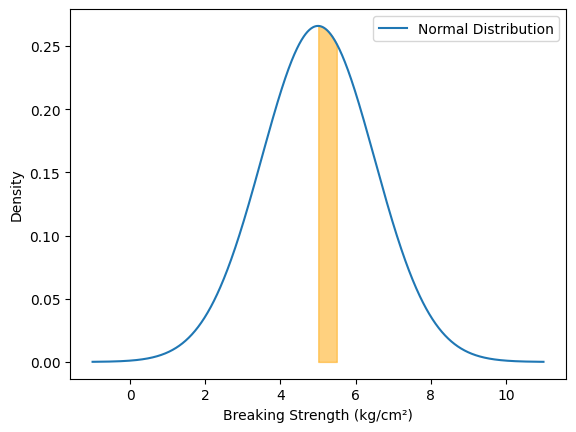

In [ ]:
x3_low = 5
x3_high = 5.5
z3_low = (x3_low - mu) / sigma
z3_high = (x3_high - mu) / sigma
prop_2_3 = stats.norm.cdf(z3_high) - stats.norm.cdf(z3_low)
print("Proportion (5 ≤ X ≤ 5.5):", round(prop_2_3, 4))

# Visual
plt.figure()
plt.plot(x, y, label='Normal Distribution')
plt.fill_between(x, 0, y, where=((x >= x3_low) & (x <= x3_high)), color='orange', alpha=0.5)
plt.xlabel('Breaking Strength (kg/cm²)')
plt.ylabel('Density')
plt.legend()
plt.show()

2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [ ]:
mu = 5
sigma = 1.5

x_low = 3
x_high = 7.5
z_low = (x_low - mu) / sigma    # -1.333...
z_high = (x_high - mu) / sigma  # 1.666...

# Left tail: X < 3
left_tail = norm.cdf(z_low)

# Right tail: X > 7.5
right_tail = 1 - norm.cdf(z_high)

# Total proportion NOT between 3 and 7.5
proportion_not_between = left_tail + right_tail
print("Proportion (X < 3 or X > 7.5):", round(proportion_not_between, 4))

Proportion (X < 3 or X > 7.5): 0.139


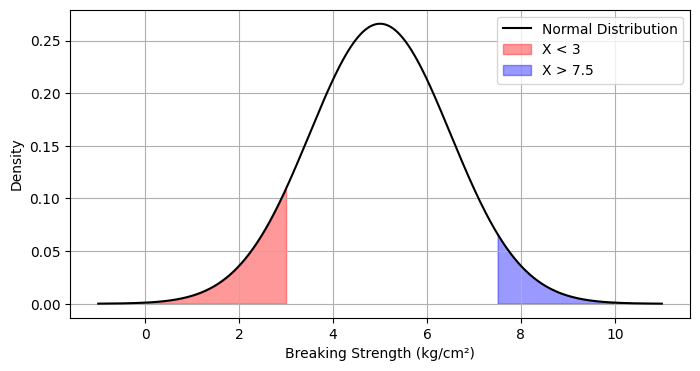

In [ ]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Normal Distribution', color='black')

# Shade left tail (X < 3)
plt.fill_between(x, 0, y, where=(x <= x_low), color='red', alpha=0.4, label='X < 3')

# Shade right tail (X > 7.5)
plt.fill_between(x, 0, y, where=(x >= x_high), color='blue', alpha=0.4, label='X > 7.5')
plt.xlabel('Breaking Strength (kg/cm²)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

 # **Problem 3**

Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level)

## Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Python-DS/Zingaro_Company.csv"
df=pd.read_csv(path)

##Exploring the data

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 75
Number of columns: 2


In [ ]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [ ]:
print(df.dtypes)

Unpolished              float64
Treated and Polished    float64
dtype: object


In [ ]:
print("\nNumber of duplicated rows:", df.duplicated().sum())


Number of duplicated rows: 0


In [ ]:
print("Missing values per column:\n")
print(df.isnull().sum())

Missing values per column:

Unpolished              0
Treated and Polished    0
dtype: int64


In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Unpolished,75.0,134.110527,33.041804,48.406838,115.329753,135.597121,158.215098,200.161313
Treated and Polished,75.0,147.788117,15.587355,107.524167,138.268300,145.721322,157.373318,192.272856


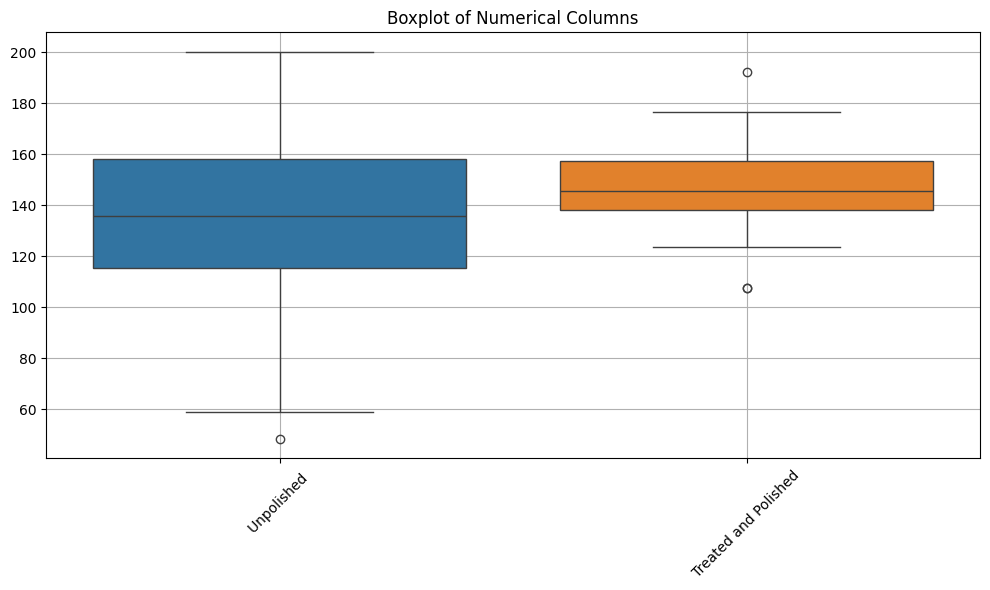

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Numerical Columns")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##Checking for outliers

In [ ]:
for column in df.columns:
    print(f"\n Outlier Check for: {column}")

    # IQR Calculation
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Print results
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")
    print(f"Number of Outliers in '{column}': {len(outliers)}")
    if not outliers.empty:
        print("Outlier Values:")
        print(outliers[[column]].to_string(index=False))
    else:
        print("No outliers found.")


 Outlier Check for: Unpolished 
Q1 = 115.33, Q3 = 158.22, IQR = 42.89
Lower Bound = 51.00, Upper Bound = 222.54
Number of Outliers in 'Unpolished ': 1
Outlier Values:
 Unpolished 
   48.406838

 Outlier Check for: Treated and Polished
Q1 = 138.27, Q3 = 157.37, IQR = 19.11
Lower Bound = 109.61, Upper Bound = 186.03
Number of Outliers in 'Treated and Polished': 3
Outlier Values:
 Treated and Polished
           192.272856
           107.524167
           107.579388


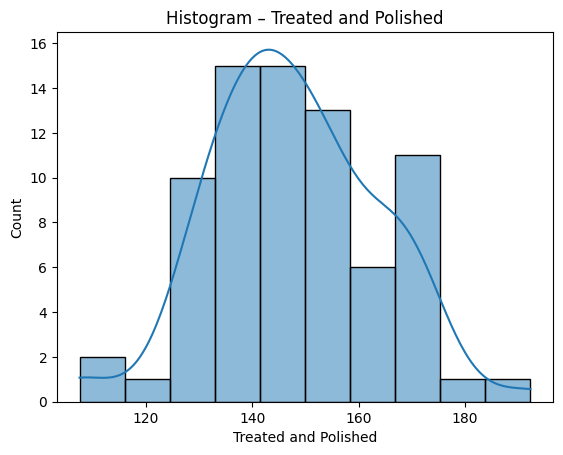

In [ ]:
sns.histplot(df["Treated and Polished"], kde=True)
plt.title("Histogram – Treated and Polished")
plt.show()


In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df["Treated and Polished"])
print("Shapiro-Wilk Test p-value:", p)

Shapiro-Wilk Test p-value: 0.33140379742063114


##**3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?**

Let's write the null and alternative hypothesis

Let 𝜇 be the mean Brinell’s hardness index of the unpolished stones supplied to Zingaro.

We will test the null hypothesis

𝐻0: 𝜇=150

against the alternate hypothesis

𝐻𝑎: 𝜇<150

**Checking T-test Assumptions**

**Continuous data:** Yes, hardness index is measured on a continuous scale.

**Normality:** Sample size is 75 (which is large enough for t-test by Central Limit Theorem).

**Random sample:** Yes, the sample is considered random.

**Unknown population standard deviation:** Yes,

t-test is appropriate, We are going with One sample Left tailed t Test  

In [ ]:
test_stat, p_value = ttest_1samp(df['Unpolished '], popmean=150, alternative='less')
mean_unpolished = np.mean(df['Unpolished '])
print('Mean Hardness (Unpolished):', round(mean_unpolished, 2))
print('t-statistic:', round(test_stat, 2))
print('p-value:', format(p_value, '.5f'))
if p_value < 0.05:
    print("Conclusion: Reject H0. The mean hardness is significantly different from 150. Unpolished stones may not be suitable for printing.")
else:
    print("Conclusion: Fail to reject H0. The mean hardness is not significantly different from 150.")

Mean Hardness (Unpolished): 134.11
t-statistic: -4.16
p-value: 0.00004
Conclusion: Reject H0. The mean hardness is significantly different from 150. Unpolished stones may not be suitable for printing.


## **3.2 Is the mean hardness of the polished and unpolished stones the same?**

Let's write the null and alternative hypothesis

Let 𝜇₁ be the mean Brinell’s hardness index of polished stones, and 𝜇₂ be the mean for unpolished stones.

We will test the null hypothesis

H0: 𝜇₁ = 𝜇₂

against the alternate hypothesis

Ha: 𝜇₁ ≠ 𝜇₂

In [ ]:
# mean and standard deviation for polished stones
print('The mean hardness for Polished stones is ' + str(round(df['Treated and Polished'].mean(), 2)))
print('The standard deviation of hardness for Polished stones is ' + str(round(df['Treated and Polished'].std(), 2)))

# mean and standard deviation for Unpolished stones
print('The mean hardness for Unpolished stones is ' + str(round(df['Unpolished '].mean(), 2)))
print('The standard deviation of hardness for Unpolished stones is ' + str(round(df['Unpolished '].std(), 2)))

The mean hardness for Polished stones is 147.79
The standard deviation of hardness for Polished stones is 15.59
The mean hardness for Unpolished stones is 134.11
The standard deviation of hardness for Unpolished stones is 33.04


Let's test whether the T-test assumptions are satisfied or not

Continuous data - Yes,Checked in EDA

Normally distributed populations - Yes, we have checked the normality distribution in EDA

Independent populations -  Yes

Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.

Random sampling from the population - Yes,

 We can use two sample T-test for this problem.

In [ ]:
polished = df['Treated and Polished']
unpolished = df['Unpolished ']

# t-test: Does not assume equal variances
t_stat, p_value = ttest_ind(polished, unpolished, equal_var=False)

print("Mean Hardness (Polished):", round(np.mean(polished), 2))
print("Mean Hardness (Unpolished):", round(np.mean(unpolished), 2))
print("t-statistic:", round(t_stat, 2))
print("p-value:", format(p_value, '.5f'))
if p_value < 0.05:
    print("Conclusion: Reject H0. There is a significant difference in mean hardness between polished and unpolished stones.")
    print("Polishing the stones has a statistically significant effect on their hardness.")
else:
    print("Conclusion: Fail to reject H0. There is no significant difference in mean hardness between polished and unpolished stones.")
    print("Polishing does not have a statistically significant effect on the hardness.")

Mean Hardness (Polished): 147.79
Mean Hardness (Unpolished): 134.11
t-statistic: 3.24
p-value: 0.00159
Conclusion: Reject H0. There is a significant difference in mean hardness between polished and unpolished stones.
Polishing the stones has a statistically significant effect on their hardness.


#**Problem 4**

Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

##Loading the data

In [ ]:
path="/content/drive/MyDrive/Python-DS/Dental Hardness data.xlsx"
df1=pd.read_excel(path)

## **Exploring the data**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [ ]:
df1.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [ ]:
print("Number of rows:", df1.shape[0])
print("Number of columns:", df1.shape[1])

Number of rows: 90
Number of columns: 5


In [ ]:
print(df1.dtypes)

Dentist     int64
Method      int64
Alloy       int64
Temp        int64
Response    int64
dtype: object


In [ ]:
print("Missing values per column:\n")
print(df1.isnull().sum())

Missing values per column:

Dentist     0
Method      0
Alloy       0
Temp        0
Response    0
dtype: int64


In [ ]:
print("\nNumber of duplicated rows:", df1.duplicated().sum())


Number of duplicated rows: 0


In [ ]:
df1.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Dentist,90.0,3.000000,1.422136,1.0,2.0,3.0,4.0,5.0
Method,90.0,2.000000,0.821071,1.0,1.0,2.0,3.0,3.0
Alloy,90.0,1.500000,0.502801,1.0,1.0,1.5,2.0,2.0
Temp,90.0,1600.000000,82.107083,1500.0,1500.0,1600.0,1700.0,1700.0
Response,90.0,741.777778,145.767845,289.0,698.0,767.0,824.0,1115.0


## Checking Outlier

In [ ]:
for column in df1.columns:
    print(f"\n Outlier Check for: {column}")

    # IQR Calculation
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]

    # Print results
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")
    print(f"Number of Outliers in '{column}': {len(outliers)}")
    if not outliers.empty:
        print("Outlier Values:")
        print(outliers[[column]].to_string(index=False))
    else:
        print("No outliers found.")


 Outlier Check for: Dentist
Q1 = 2.00, Q3 = 4.00, IQR = 2.00
Lower Bound = -1.00, Upper Bound = 7.00
Number of Outliers in 'Dentist': 0
No outliers found.

 Outlier Check for: Method
Q1 = 1.00, Q3 = 3.00, IQR = 2.00
Lower Bound = -2.00, Upper Bound = 6.00
Number of Outliers in 'Method': 0
No outliers found.

 Outlier Check for: Alloy
Q1 = 1.00, Q3 = 2.00, IQR = 1.00
Lower Bound = -0.50, Upper Bound = 3.50
Number of Outliers in 'Alloy': 0
No outliers found.

 Outlier Check for: Temp
Q1 = 1500.00, Q3 = 1700.00, IQR = 200.00
Lower Bound = 1200.00, Upper Bound = 2000.00
Number of Outliers in 'Temp': 0
No outliers found.

 Outlier Check for: Response
Q1 = 698.00, Q3 = 824.00, IQR = 126.00
Lower Bound = 509.00, Upper Bound = 1013.00
Number of Outliers in 'Response': 10
Outlier Values:
 Response
     1115
      493
      289
      312
     1048
      421
      483
      405
      405
      312


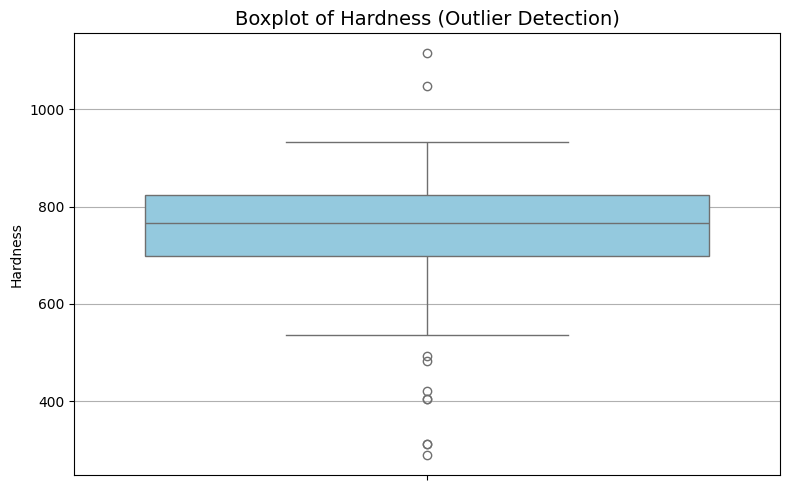

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df1 ['Response'], color='skyblue')
plt.title('Boxplot of Hardness (Outlier Detection)', fontsize=14)
plt.ylabel('Hardness')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## **4.1 How does the hardness of implants vary depending on dentists?**

##Normality check for both alloys seprately

In [ ]:
alloy1 = df1[df1['Alloy'] == 1]['Response']
alloy2 = df1[df1['Alloy'] == 2]['Response']

# Shapiro-Wilk test
stat1, p1 = shapiro(alloy1)
stat2, p2 = shapiro(alloy2)

print(f"Shapiro-Wilk Test - Alloy 1: Statistic = {stat1:.3f}, p-value = {p1:.5f}")
print(f"Shapiro-Wilk Test - Alloy 2: Statistic = {stat2:.3f}, p-value = {p2:.5f}")


Shapiro-Wilk Test - Alloy 1: Statistic = 0.830, p-value = 0.00001
Shapiro-Wilk Test - Alloy 2: Statistic = 0.888, p-value = 0.00040


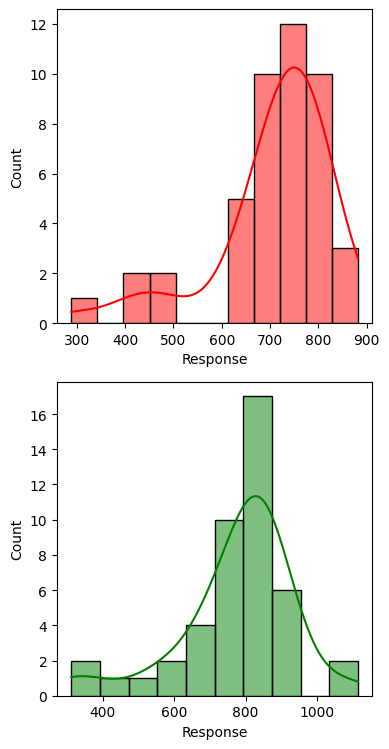

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(4, 8))

# Histogram + KDE for Alloy 1
sns.histplot(alloy1, kde=True, ax=axs[0], color='red')

# Histogram + KDE for Alloy 2
sns.histplot(alloy2, kde=True, ax=axs[1], color='green')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##Levene's Test

We will test the null hypothesis

𝐻0 : All the population variances are equal

against the alternative hypothesis

𝐻𝑎 : At least one variance is different from the rest

In [ ]:
df1_alloy1 = df1[df1['Alloy'] == 1]

# Group Response values by Dentist
groups = [group['Response'].values for name, group in df1_alloy1.groupby('Dentist')]

# Perform Levene's Test
stat, p_value = levene(*groups)

print(f"Levene’s Test for Homogeneity of Variance (Alloy 1 - Dentist):")
print(f"Statistic = {stat:.3f}, p-value = {p_value:.5f}")

df1_alloy2 = df1[df1['Alloy'] == 2]
groups_alloy2 = [group['Response'].values for name, group in df1_alloy2.groupby('Dentist')]
stat_levene, p_levene = levene(*groups_alloy2)
print(f"Levene’s Test (Alloy 2): Statistic = {stat_levene:.3f}, p-value = {p_levene:.5f}")

Levene’s Test for Homogeneity of Variance (Alloy 1 - Dentist):
Statistic = 1.385, p-value = 0.25655
Levene’s Test (Alloy 2): Statistic = 1.446, p-value = 0.23687


The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
Samples are independent simple random samples - Yes,
Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

##**One way Anova - Alloy 1**

One way Anova test

Let 𝜇₁, 𝜇₂, 𝜇₃, 𝜇₄, and 𝜇₅ be the mean hardness values for dentists 1 to 5 respectively.

Statistical Hypotheses

We will test the Null hypothesis:
 H0: 𝜇₁ = 𝜇₂ = 𝜇₃ = 𝜇₄ = 𝜇₅

against the Alternative hypothesis:
 Ha: At least one 𝜇 differs

In [ ]:
df1_alloy1 = df1[df1['Alloy'] == 1]

# Create groups for each Dentist (1 to 5)
group1 = df1_alloy1[df1_alloy1['Dentist'] == 1]['Response']
group2 = df1_alloy1[df1_alloy1['Dentist'] == 2]['Response']
group3 = df1_alloy1[df1_alloy1['Dentist'] == 3]['Response']
group4 = df1_alloy1[df1_alloy1['Dentist'] == 4]['Response']
group5 = df1_alloy1[df1_alloy1['Dentist'] == 5]['Response']

# Perform One-Way ANOVA
stat, p_value = f_oneway(group1, group2, group3, group4, group5)
print(f"One-Way ANOVA (Alloy 1 - Dentist): F = {stat:.3f}, p-value = {p_value:.5f}")

One-Way ANOVA (Alloy 1 - Dentist): F = 1.977, p-value = 0.11657


Since the p-value is greater than 0.05, we fail to reject the null hypothesis.


**Tukey HSD test for alloy 1**

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD test for Alloy 1
tukey_alloy1 = pairwise_tukeyhsd(endog=df1_alloy1['Response'],
                                 groups=df1_alloy1['Dentist'],
                                 alpha=0.05)

print(tukey_alloy1.summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   11.3333 0.9996 -145.0423  167.709  False
     1      3  -32.3333 0.9757  -188.709 124.0423  False
     1      4  -68.7778 0.7189 -225.1535  87.5979  False
     1      5 -122.2222 0.1889 -278.5979  34.1535  False
     2      3  -43.6667 0.9298 -200.0423  112.709  False
     2      4  -80.1111 0.5916 -236.4868  76.2646  False
     2      5 -133.5556 0.1258 -289.9312  22.8201  False
     3      4  -36.4444 0.9626 -192.8201 119.9312  False
     3      5  -89.8889 0.4805 -246.2646  66.4868  False
     4      5  -53.4444 0.8643 -209.8201 102.9312  False
--------------------------------------------------------


The test found no statistically significant differences between any dentist pairs (all p-values > 0.05).
This result supports the earlier conclusion from ANOVA that the mean implant hardness does not significantly vary by dentist for Alloy 1.


##**One way Anova test - Alloy 2**



In [ ]:
df1_alloy2 = df1[df1['Alloy'] == 2]

# One-Way ANOVA for Alloy 2 (grouped by Dentist)
groups2 = [df1_alloy2[df1_alloy2['Dentist'] == d]['Response'] for d in df1_alloy2['Dentist'].unique()]
f_stat2, p_val2 = f_oneway(*groups2)
print("\nANOVA – Alloy 2 (Dentist):")
print(f"F-statistic = {f_stat2:.3f}, p-value = {p_val2:.5f}")


ANOVA – Alloy 2 (Dentist):
F-statistic = 0.525, p-value = 0.71803


Since the p-value is greater than 0.05, we fail to reject the null hypothesis.




**Tukey HSD test for alloy 2**

In [ ]:
tukey2 = pairwise_tukeyhsd(endog=df1_alloy2['Response'],
                           groups=df1_alloy2['Dentist'],
                           alpha=0.05)
print("\nTukey HSD – Alloy 2 (Dentist):")
print(tukey2.summary())


Tukey HSD – Alloy 2 (Dentist):
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     1      2  -4.1111    1.0 -225.5687 217.3465  False
     1      3 -36.5556 0.9895 -258.0131  184.902  False
     1      4    -70.0 0.8941 -291.4576 151.4576  False
     1      5 -90.1111 0.7724 -311.5687 131.3465  False
     2      3 -32.4444 0.9933  -253.902 189.0131  False
     2      4 -65.8889 0.9132 -287.3465 155.5687  False
     2      5    -86.0 0.8008 -307.4576 135.4576  False
     3      4 -33.4444 0.9925  -254.902 188.0131  False
     3      5 -53.5556 0.9574 -275.0131  167.902  False
     4      5 -20.1111  0.999 -241.5687 201.3465  False
-------------------------------------------------------


The test found no statistically significant differences between any dentist pairs (all p-values > 0.05).
This result supports the earlier conclusion from ANOVA that the mean implant hardness does not significantly vary by dentist for Alloy 2.


##**4.2 How does the hardness of implants vary depending on methods?**

Normality and Levene check already done for 4.1 and assumptions are satifisfied

**One way Anova test for alloy 1**

Let 𝜇₁, 𝜇₂, and 𝜇₃ be the mean hardness values for Methods 1, 2, and 3 respectively.

Statistical Hypotheses

We will test the Null Hypothesis:
H0: 𝜇₁ = 𝜇₂ = 𝜇₃
against the Alternative Hypothesis:
Ha: At least one 𝜇 differs

In [ ]:
from scipy.stats import f_oneway

# Subset for Alloy 1
alloy1 = df1[df1['Alloy'] == 'Alloy 1']

# Perform one-way ANOVA test
test_stat1, p_value1 = f_oneway(alloy1.loc[alloy1['Method'] == '1', 'Response'],
                                alloy1.loc[alloy1['Method'] == '2', 'Response'],
                                alloy1.loc[alloy1['Method'] == '3', 'Response'])

print("Alloy 1 – ANOVA by Method")
print("The p-value is " + str(p_value1))

Alloy 1 – ANOVA by Method
The p-value is nan


/tmp/ipython-input-68-2263331258.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  test_stat1, p_value1 = f_oneway(alloy1.loc[alloy1['Method'] == '1', 'Response'],


In [ ]:
alloy2 = df1[df1['Alloy'] == 'Alloy 2']

# Perform one-way ANOVA test
test_stat2, p_value2 = f_oneway(alloy2.loc[alloy2['Method'] == '1', 'Response'],
                                alloy2.loc[alloy2['Method'] == '2', 'Response'],
                                alloy2.loc[alloy2['Method'] == '3', 'Response'])

print("Alloy 2 – ANOVA by Method")
print("The p-value is " + str(p_value2))


Alloy 2 – ANOVA by Method
The p-value is nan


/tmp/ipython-input-22-1055646248.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  test_stat2, p_value2 = f_oneway(alloy2.loc[alloy2['Method'] == '1', 'Response'],


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# ANOVA  for Alloy 1

alloy1 = df1[df1['Alloy'] == 1]

# ANOVA
model1 = ols('Response ~ C(Method)', data=alloy1).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)
print(anova_table1)

                  sum_sq    df         F    PR(>F)
C(Method)  148472.177778   2.0  6.263327  0.004163
Residual   497805.066667  42.0       NaN       NaN


Since p-value < 0.05, we reject the null hypothesis

**Tukey HSD test for alloy 1**

In [ ]:
tukey1 = pairwise_tukeyhsd(endog=alloy1['Response'],
                           groups=alloy1['Method'],
                           alpha=0.05)

print(tukey1.summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


**One way Anova test - Alloy 2**

Let 𝜇₁, 𝜇₂, and 𝜇₃ be the mean hardness values for Methods 1, 2, and 3 respectively.

Statistical Hypotheses

We will test the Null Hypothesis: H0: 𝜇₁ = 𝜇₂ = 𝜇₃ against the Alternative Hypothesis: Ha: At least one 𝜇 differs

In [ ]:
# ANOVA  for Alloy 1

alloy2 = df1[df1['Alloy'] == 2]

# ANOVA
model2 = ols('Response ~ C(Method)', data=alloy2).fit()
anova_table2 = sm.stats.anova_lm(model1, typ=2)
print(anova_table2)

                  sum_sq    df         F    PR(>F)
C(Method)  148472.177778   2.0  6.263327  0.004163
Residual   497805.066667  42.0       NaN       NaN


Since p-value < 0.05, we reject the null hypothesis

**Tukey HSD test for alloy 2**

In [ ]:
tukey2 = pairwise_tukeyhsd(endog=alloy2['Response'],
                           groups=alloy2['Method'],
                           alpha=0.05)
print("\nTukey HSD Results – Alloy 2 (Method):")
print(tukey2.summary())


Tukey HSD Results – Alloy 2 (Method):
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


Method 3 results in significantly lower hardness than both Method 1 and Method 2.

Method 1 and Method 2 do not differ significantly.

##4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

Interaction Plot for Alloy 1

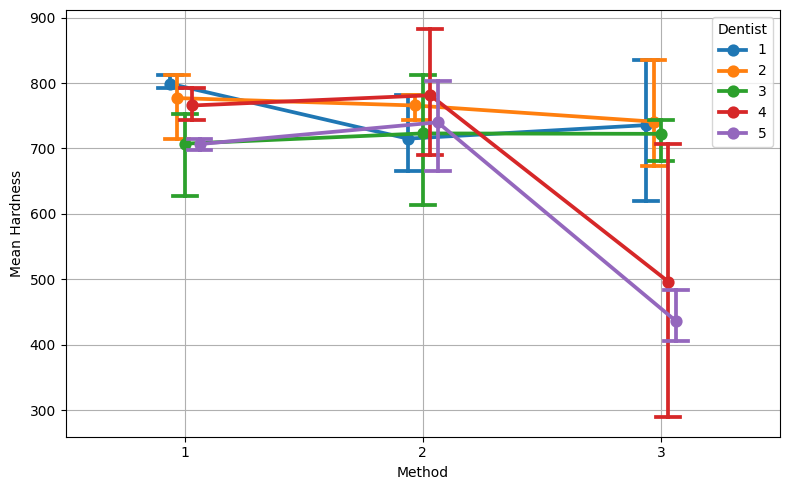

In [ ]:
#Format columns
df1['Dentist'] = df1['Dentist'].astype(str)
df1['Method'] = df1['Method'].astype(str)
df1['Alloy'] = df1['Alloy'].astype(str)
alloy1 = df1[df1['Alloy'] == '1']

plt.figure(figsize=(8, 5))
sns.pointplot(data=alloy1, x='Method', y='Response', hue='Dentist', dodge=True, markers='o', capsize=.1)
plt.xlabel('Method')
plt.ylabel('Mean Hardness')
plt.grid(True)
plt.tight_layout()
plt.show()

Interaction Plot for Alloy 2

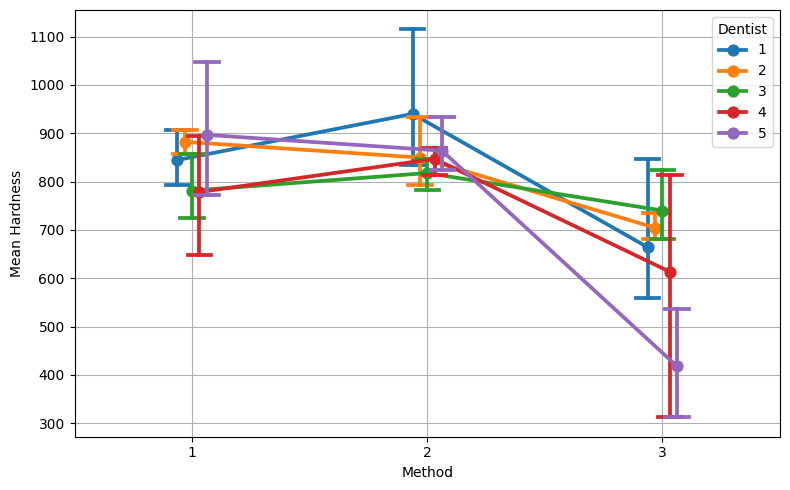

In [ ]:
alloy2 = df1[df1['Alloy'] == '2']

plt.figure(figsize=(8, 5))
sns.pointplot(data=alloy2, x='Method', y='Response', hue='Dentist', dodge=True, markers='o', capsize=.1)
plt.xlabel('Method')
plt.ylabel('Mean Hardness')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.4 How does the hardness of implants vary depending on dentists and methods together?

already done normality and levene checks in 4.1 and 4.2

Assumptions are satisfied

We will test the Null Hypothesis:

H₀: All μdm values are equal (no interaction effect)
 (The mean hardness is the same across all dentist-method combinations)

against the Alternative Hypothesis:
Hₐ: At least one μdm differs
 (The mean hardness differs for at least one dentist-method combinations)

**Two way Anova for Alloy 1**

In [ ]:
# Alloy 1

# Two-Way ANOVA with interaction
model_alloy1 = ols('Response ~ C(Dentist) * C(Method)', data=alloy1).fit()
anova_table1 = sm.stats.anova_lm(model_alloy1, typ=2)
print(anova_table1.loc[['C(Dentist):C(Method)']])

                             sum_sq   df         F    PR(>F)
C(Dentist):C(Method)  185941.377778  8.0  3.398383  0.006793


p value of Dentist is greater than 0.05 , so we reject the null hypothesis and conclude that dentist-method combinations significantly influence hardness for Alloy 1.

# **Tukey HSD test for Alloy 1**

In [ ]:
alloy1['Group'] = alloy1['Dentist'].astype(str) + '_' + alloy1['Method'].astype(str)

# Run Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_alloy1 = pairwise_tukeyhsd(endog=alloy1['Response'],
                                 groups=alloy1['Group'],
                                 alpha=0.05)

print(tukey_alloy1)

/tmp/ipython-input-79-373737401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alloy1['Group'] = alloy1['Dentist'].astype(str) + '_' + alloy1['Method'].astype(str)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   1_1    1_2     -84.0 0.9933 -332.8283  164.8283  False
   1_1    1_3  -63.3333 0.9996 -312.1617   185.495  False
   1_1    2_1     -22.0    1.0 -270.8283  226.8283  False
   1_1    2_2  -33.3333    1.0 -282.1617   215.495  False
   1_1    2_3     -58.0 0.9999 -306.8283  190.8283  False
   1_1    3_1  -91.6667 0.9853  -340.495  157.1617  False
   1_1    3_2     -76.0 0.9975 -324.8283  172.8283  False
   1_1    3_3  -76.6667 0.9972  -325.495  172.1617  False
   1_1    4_1  -33.3333    1.0 -282.1617   215.495  False
   1_1    4_2  -17.6667    1.0  -266.495  231.1617  False
   1_1    4_3 -302.6667  0.007  -551.495  -53.8383   True
   1_1    5_1  -92.3333 0.9844 -341.1617   156.495  False
   1_1    5_2     -59.0 0.9998 -307.8283  189.8283  False
   1_1    5_3 -362.6667 0.0007  -611.495 -113.8383   True
   1_2    1_3 

Filtering out the false values to put in business report

In [ ]:
tukey_df = pd.DataFrame(data=tukey_alloy1.summary().data[1:],  # skip header row
                        columns=tukey_alloy1.summary().data[0])  # use header row

# Filter rows where reject == True
significant_pairs = tukey_df[tukey_df['reject'] == True]

# Display only the significant results
print(significant_pairs)

    group1 group2  meandiff   p-adj     lower     upper  reject
10     1_1    4_3 -302.6667  0.0070 -551.4950  -53.8383    True
13     1_1    5_3 -362.6667  0.0007 -611.4950 -113.8383    True
26     1_2    5_3 -278.6667  0.0173 -527.4950  -29.8383    True
38     1_3    5_3 -299.3333  0.0079 -548.1617  -50.5050    True
46     2_1    4_3 -280.6667  0.0160 -529.4950  -31.8383    True
49     2_1    5_3 -340.6667  0.0016 -589.4950  -91.8383    True
56     2_2    4_3 -269.3333  0.0243 -518.1617  -20.5050    True
59     2_2    5_3 -329.3333  0.0025 -578.1617  -80.5050    True
68     2_3    5_3 -304.6667  0.0065 -553.4950  -55.8383    True
76     3_1    5_3 -271.0000  0.0229 -519.8283  -22.1717    True
83     3_2    5_3 -286.6667  0.0128 -535.4950  -37.8383    True
89     3_3    5_3 -286.0000  0.0131 -534.8283  -37.1717    True
91     4_1    4_3 -269.3333  0.0243 -518.1617  -20.5050    True
94     4_1    5_3 -329.3333  0.0025 -578.1617  -80.5050    True
95     4_2    4_3 -285.0000  0.0137 -533

**Two way Anova for Alloy 2**

In [ ]:
model_alloy2 = ols('Response ~ C(Dentist) * C(Method)', data=alloy2).fit()

# Generate the ANOVA table
anova_table2 = sm.stats.anova_lm(model_alloy2, typ=2)

# Display the results
print(anova_table2.loc[['C(Dentist):C(Method)']])

                             sum_sq   df         F    PR(>F)
C(Dentist):C(Method)  197459.822222  8.0  1.922787  0.093234


The interaction effect between dentist and method is not statistically significant p vlaue is greater than 0.5 (0.0932 > 0.5)

**Tukey HSD test for Alloy 2**

In [ ]:
# Create Group column for Alloy 2
alloy2['Group'] = alloy2['Dentist'].astype(str) + '_' + alloy2['Method'].astype(str)

# Run Tukey HSD
tukey_alloy2 = pairwise_tukeyhsd(endog=alloy2['Response'],
                                 groups=alloy2['Group'],
                                 alpha=0.05)
print(tukey_alloy2)

/tmp/ipython-input-84-1725879209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alloy2['Group'] = alloy2['Dentist'].astype(str) + '_' + alloy2['Method'].astype(str)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   1_1    1_2   95.3333  0.999 -245.5625  436.2292  False
   1_1    1_3 -180.6667 0.8085 -521.5625  160.2292  False
   1_1    2_1   37.6667    1.0 -303.2292  378.5625  False
   1_1    2_2       5.0    1.0 -335.8958  345.8958  False
   1_1    2_3 -140.3333 0.9635 -481.2292  200.5625  False
   1_1    3_1  -63.3333    1.0 -404.2292  277.5625  False
   1_1    3_2     -27.0    1.0 -367.8958  313.8958  False
   1_1    3_3 -104.6667 0.9973 -445.5625  236.2292  False
   1_1    4_1  -66.3333    1.0 -407.2292  274.5625  False
   1_1    4_2    2.3333    1.0 -338.5625  343.2292  False
   1_1    4_3 -231.3333 0.4686 -572.2292  109.5625  False
   1_1    5_1      52.0    1.0 -288.8958  392.8958  False
   1_1    5_2   19.3333    1.0 -321.5625  360.2292  False
   1_1    5_3    -427.0 0.0049 -767.8958  -86.1042   True
   1_2    1_3 

Filtering out the false values to put in business report

In [ ]:
# Convert to DataFrame for filtering
tukey_df2 = pd.DataFrame(data=tukey_alloy2.summary().data[1:],  # skip header
                         columns=tukey_alloy2.summary().data[0])

# Filter only significant comparisons (reject == True)
significant_alloy2 = tukey_df2[tukey_df2['reject'] == True]

# Display the significant ones
print(significant_alloy2)

    group1 group2  meandiff   p-adj     lower     upper  reject
13     1_1    5_3 -427.0000  0.0049 -767.8958  -86.1042    True
26     1_2    5_3 -522.3333  0.0003 -863.2292 -181.4375    True
49     2_1    5_3 -464.6667  0.0017 -805.5625 -123.7708    True
59     2_2    5_3 -432.0000  0.0043 -772.8958  -91.1042    True
76     3_1    5_3 -363.6667  0.0279 -704.5625  -22.7708    True
83     3_2    5_3 -400.0000  0.0105 -740.8958  -59.1042    True
94     4_1    5_3 -360.6667  0.0302 -701.5625  -19.7708    True
98     4_2    5_3 -429.3333  0.0046 -770.2292  -88.4375    True
103    5_1    5_3 -479.0000  0.0011 -819.8958 -138.1042    True
104    5_2    5_3 -446.3333  0.0028 -787.2292 -105.4375    True


Conclusions are interpretations present in business report